<div style="border:solid Chocolate 2px; padding: 40px">

<b>Привет!👋</b>

Меня зовут Огурлиев Анзор, я буду ревьюером твоего проекта. Сразу хочу предложить тебе общаться на "ты", если тебе это неудобно, скажи мне об этом. Нам предстоит пройти с тобой через тернистый и от того интересный путь анализа данных! Можешь не переживать, я всегда помогу тебе, если у тебя возникнут вопросы)

По ходу твоей работы я буду оставлять свои комментарии, по выполненным тобой шагам. Попрошу тебя не удалять их, так мне будет проще отслеживать твой прогресс в случае повторной проверки.

Очень важно вести диалог и обсуждать те пункты, которые у тебя могли не получиться, поэтому, ты можешь оставлять свои комментарии, и мы обязательно во всем разберемся! Самое главное - выделяй свои комментарии удобным для тебя способом (цвет, рамка), но так, чтобы они отчетлитво отличались от моих комментариев. Так мы ни в чем не запутаемся)

Свои комментарии я буду выделять так: <font color='green'>зеленый</font>, <font color='gold'>желтый</font> и <font color='red'>красный</font> цвет, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Этот комментарий я буду оставлять, если твое решение оптимально для данного шага.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Это не означает, что ты совершил ошибку. Такими комментариями я буду отмечать места, где ты справился с задачей, но её можно решить ещё лучше. Также в таких комментариях я буду оставлять для тебя другие советы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Если решение, которое ты применил на определенном шаге, требует значительных изменений, то я буду оставлять такой комментарий. Тебе нужно будет подумать еще раз как правильным образом решить данный этап. Если ревью содержит такие комментарии, то я не смогу принять проект с первого раза.
</div>

P.S. В оглавлении комментария ты увидишь `V1` (`V1`, `V2`, `V3`) - это версия моего комментария, которая понадобится нам с тобой, чтобы не запутаться, если потребуется оставить тебе комментарии после первой проверки.

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец, что начинаешь проект с описания.

### Откройте файл с данными и изучите общую информацию. 

#### Импортируем данные в датасет

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv')
data.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Данные в таблице "слиплись", не удобно к просмотру и анализу. Добавим разделитель "sep='\t'"

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Теперь таблица имеет презентабельный внешний вид.

#### Изучаем общую информацию о полученных данных

In [3]:
data.info() #посмотрим типы данных и количество ненулевых значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Строим гистограммы

``_ = `` для того, чтобы не выводилась информация об объекте

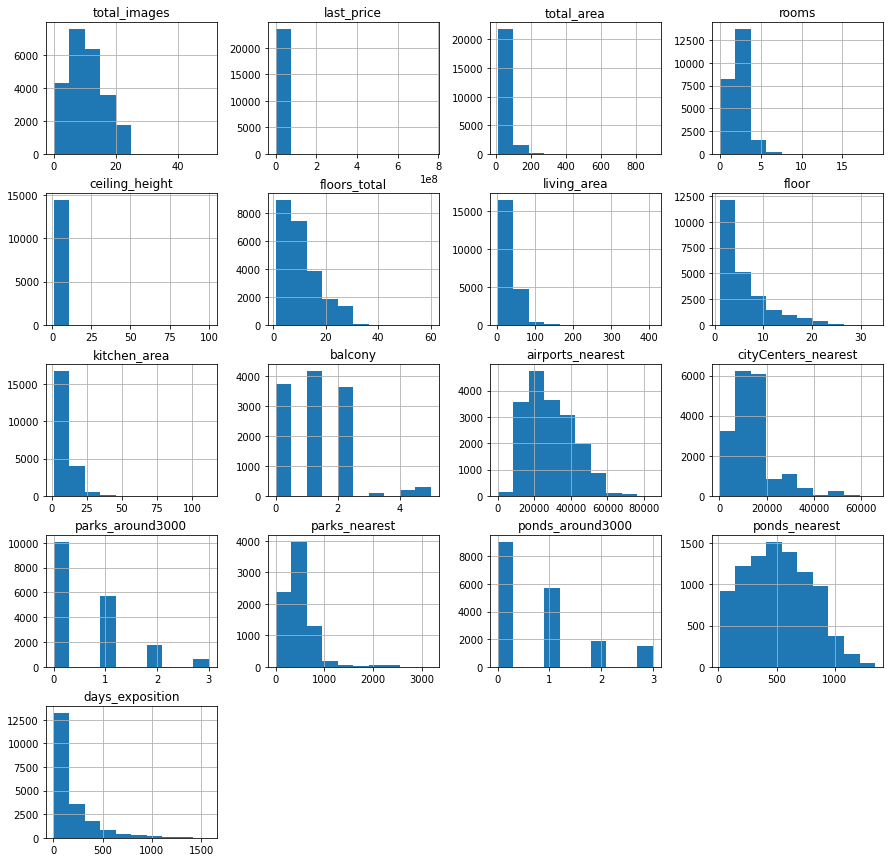

In [4]:
_ = data.hist(figsize=(15, 15)) #строим гистораммы

# Вывод:

По выводу таблицы можно заметить следующее:

 * **first_day_exposition** (дата публикации) имеет тип object, а должен быть тип datatime
 * **ceiling_height** имеет нулевые значения
 * **floors_total** (всего этажей в доме) имеет тип float64, а должен быть тип int. Имеет нулевые значения
 * **living_area** имеет нулевые значения
 * **is_apartment** (апартаменты (булев тип) имеет тип object, а должен быть тип bool
 * **kitchen_area** имеет нулевые значения
 * **balcony** имеет нулевые значения
 * **locality_name** имеет нулевые значения
 * **airports_nearest** имеет нулевые значения
 * **cityCenters_nearest** имеет нулевые значения
 * **parks_around3000** (число парков в радиусе 3 км) имеет тип float64, а должен быть тип int. Имеет нулевые значения
 * **parks_nearest** имеет нулевые значения
 * **ponds_around3000** (число водоемов в радиусе 3 км) имеет тип float64, а должен быть тип int. Имеет нулевые значения
 * **ponds_nearest** имеет нулевые значения
 * **days_exposition** ( сколько дней было размещено объявление (от публикации до снятия) имеет тип float64, а должен быть тип int. Имеет нулевые значения

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Правильно рассмотрела данные, с которыми предстоит работать.

### Предобработка данных

In [5]:
#переименуем столбцы, чтобы названия соответсвовали единому стилю
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

In [6]:
#смотрим пропущенные значения
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Замена значений

In [7]:
# в столбец 'is_apartment', наверное, вносили записи не регулярно, все пропущенные значения заменим на False
data['is_apartment'] = data['is_apartment'].fillna(False)
data[['is_apartment']].head(10)

,is_apartment
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [8]:
# востанавливаем пропуски высоты потолков медианным значением
data['ceiling_height'] = data['ceiling_height'].fillna(int(data['ceiling_height'].median()))
data[['ceiling_height']].head(10)

,ceiling_height
0,2.70
1,2.00
2,2.00
3,2.00
4,3.03
5,2.00
6,2.00
7,2.00
8,2.00
9,2.50


In [9]:
#заменим пропуски в 'balcony' на 0 и изменим тип данных на int
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')
data[['balcony']].head(10)

,balcony
0,0
1,2
2,0
3,0
4,0
5,0
6,1
7,2
8,0
9,2


In [10]:
#удалем строки с Null 'locality_name'
data['locality_name'].dropna(inplace=True)
data[['locality_name']].head(10)

,locality_name
0,Санкт-Петербург
1,посёлок Шушары
2,Санкт-Петербург
3,Санкт-Петербург
4,Санкт-Петербург
5,городской посёлок Янино-1
6,посёлок Парголово
7,Санкт-Петербург
8,посёлок Мурино
9,Санкт-Петербург


In [11]:
#удалем строки с Null floors_total
data['floors_total'].dropna(inplace=True)
#data['floors_total'] = data['floors_total'].fillna(int(data['floors_total'].mean()))
data[['floors_total']].head(10)

,floors_total
0,16.0
1,11.0
2,5.0
3,14.0
4,14.0
5,12.0
6,26.0
7,24.0
8,27.0
9,9.0


living_area - жилая площадь
kitchen_area - площадь кухни
total_area - общая площадь

In [12]:
#восстанавливаем данные жилой площади
# создаем перпеменную avg_ratio_between_living_and_total_area - среднее соотношение площадей между жилой и общей плащадью
avg_ratio_between_living_and_total_area = (data[~data['living_area'].isnull()]['living_area'] / data[~data['living_area'].isnull()]['total_area']).median()
data.loc[data['living_area'].isnull(), 'living_area'] = avg_ratio_between_living_and_total_area * data[data['living_area'].isnull()]['total_area']

#восстанавливаем данные кухонной площади
#по анологии с жилой площадью
avg_ratio_between_kitchen_and_total_area = (data[~data['kitchen_area'].isnull()]['kitchen_area'] / data[~data['kitchen_area'].isnull()]['total_area']).median()
data.loc[data['kitchen_area'].isnull(), 'kitchen_area'] = avg_ratio_between_kitchen_and_total_area * data[data['kitchen_area'].isnull()]['total_area']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Правильно обработала пропуски в параметрах выше.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Никогда не выводи полностью датафрейм, ты в данном случае не увидела больше 10 строк, а все остальные загрузились в память и в ней хранятся. Если блокнот будет большим и датафрейм в разы больше, то все будет тормозить. Используй метод head() вместо вывода всего датафрейма.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Пропуски в высоте потолков можно восстановить, это достаточно типовое значение, можно заполнить медианой.
   
В площадях тоже нужно восстановить пропуски. Жилая площадь и площадь кухни сильно коррелируют с общей площадью, можно отталкиваться от этого. Посчитать отношение жилой площади к общей площади, взять медиану от этих коэффициентов, и с её помощью восстановить пропуски, умножив на общую площадь. Аналогично и площадь кухни.

<div class="alert alert-info"
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>    

 * пропуски в высоте потолков восстановили медианным значением
 * заполнили пропуски жилой площади и кухонной площади

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно доработала, молодец!

#### Смена типа строк

In [13]:
#изменим 'last_price' на тип int для удобства просмотра
data['last_price'] = data['last_price'].astype('int')
data[['last_price']].head(10)

,last_price
0,13000000
1,3350000
2,5196000
3,64900000
4,10000000
5,2890000
6,3700000
7,7915000
8,2900000
9,5400000


In [14]:
#переведем столбец 'first_day_exposition' в формат даты без времени, 
#так как время не указано и не несет за собой важной информации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['first_day_exposition'].head(10)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]

In [15]:
#заменим пропуски в 'days_exposition' на -100 т.к. минимальное значение в этом столбце 1,
#значит в качестве пустого значения можно использовать -100
data[['days_exposition']].describe()

,days_exposition
count,20518.000000
mean,180.888634
std,219.727988
min,1.000000
25%,45.000000
50%,95.000000
75%,232.000000
max,1580.000000


In [16]:
# В качестве заглушки проставим значение -100 в столбце days_exposition
data['days_exposition'] = data['days_exposition'].fillna(-100).astype('int')
data[['days_exposition']].head(10)

,days_exposition
0,-100
1,81
2,558
3,424
4,121
5,55
6,155
7,-100
8,189
9,289


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Всегда подробно объясняй свои действия. В данном случае 0 это что? Заглушка или ты считаешь, что это какие то определнные объявления. Если это заглушка, то её в дальнейшем нужно не забыть отфильтровать при анализе срока продаж.

<div class="alert alert-info"
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>

* прислушались к комментариям и добавили описание шагов

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отлично!

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

#### Изучение уникальных значений

In [18]:
#изучение уникальных значений
def loc_length():
    return print('Количество уникальных занчений locality_name:', data['locality_name'].unique().shape[0])
loc_length()

Количество уникальных занчений locality_name: 365


In [19]:
#приводим к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()

In [20]:
#заменяем все "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
loc_length()

Количество уникальных занчений locality_name: 331


In [21]:
#заменяем "городской поселок" на "поселок городского типа"
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
loc_length()

Количество уникальных занчений locality_name: 324


In [22]:
#проверка наличия дубликатов
print('Количетво явных дубликатов:', data.duplicated().sum())

Количетво явных дубликатов: 0


<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Это далеко не все неявные дубликаты. Есть еще много типов населенных пунктов, написанных по-разному, но означающих одно и то же. Я бы оставил только названия, удалив все типы, так можно было бы избавиться от всех неявных дубликатов.

#### Устронение выбросов

In [23]:
#устроняем выбросы
#смотрим на распределение значений в данных
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.472164,10.673824,34.578214,5.892358,10.491431,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,143.186337
std,5.682529,1.088701e+07,35.654083,1.078405,1.055732,6.597173,22.340665,4.885249,6.029020,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,225.762590
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,-100.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.000000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,22.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.500000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,74.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,199.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


 ``total_images `` - выглядит хорошо, оставим без изменений

 ``last_price `` - взглянем на квартиры от 0 до 20 млн, нет квартир стоимостью 0.
Есть одна квартира стоимостью меньше 100 000, её мы учитывать не будем.
225 квартир стоимостью меньше 1млн - не похоже на выброс, оставляем.
Убираем слишком дорогие квартиры стоимостью больше 100.000.000.

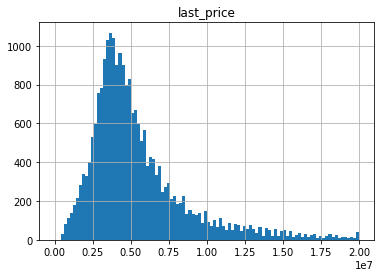

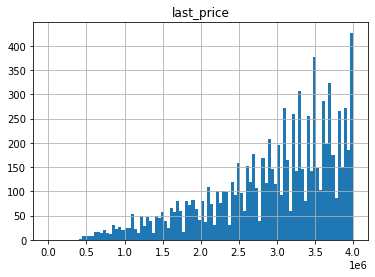

In [24]:
data.drop(index=data.query('last_price < 1e+05').index,inplace=True)

_ = data.hist('last_price', bins=100, range=(0,2e+07));
_ = data.hist('last_price', bins=100, range=(0,4e+06));

``total_area`` - нет квартир площадью меньше 10 кв.м., но есть меньше 20.

Квартиры со слишком большой площадью более 500 кв.м. похожи на элитную недвижимость, поэтому удалим.



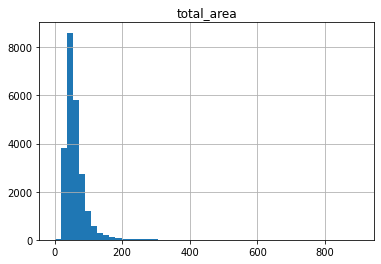

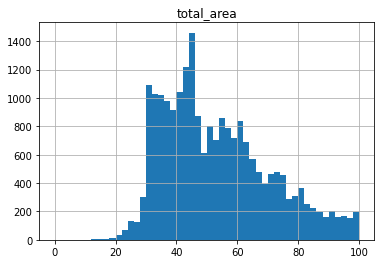

In [25]:
data.drop(index=data.query('total_area > 500').index,inplace=True)

_ = data.hist('total_area', bins=50, range=(0,900))
_ = data.hist('total_area', bins=50, range=(0,100))

In [26]:
#удаляем квартиры с аномальным кол-вом комнат
data.drop(index=data.query('rooms > 7').index,inplace=True)

``ceiling_height`` - высота потолков.
Независимо от года постройки и от типа здания, высота от пола до потолка должна быть в пределах 2,5-3,2 метров. Можно предположить, что квартиры с высотой потолков 25-36м на самом деле являются опечаткой и соотвествуют 2.5-3.6м
Исходя их этого предполагаем, что все квартиры с высотой потолков от 36м являются выбросами. 

In [27]:
#удаляем квартиры с высотой потолков от 4 до 25метров.
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True)
#для квартир с высотой потолков до 25 до 36 метров предполагаем, что это опечатка и делим на 10, получая 2.5 и 3.6 метра.
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)
#удаляем квартиры с высотой потолков от 36 метров.
data.drop(index=data.query('ceiling_height > 36').index,inplace=True)

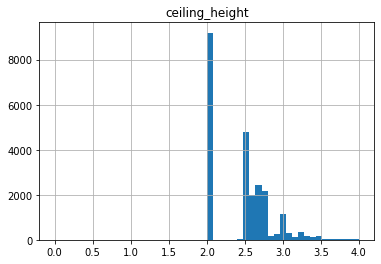

In [28]:
#строим гистограмму
_ = data.hist('ceiling_height',bins=50,range=(0,4))

``living_area``
Отбросим значения с жилой площадью меньше 10кв.м.
Отбросим квартиры с площадью более 200 кв.м.

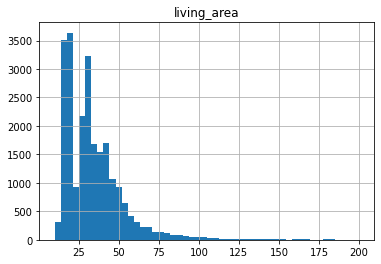

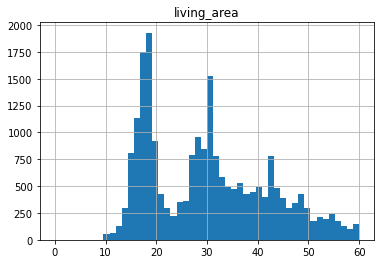

In [29]:
data.drop(index=data.query('living_area < 10').index,inplace=True) #убираем кв меньше 10кв.м
data.drop(index=data.query('living_area > 200').index,inplace=True) #убираем кв более 200 кв.м.

_ = data.hist('living_area', bins=50);
_ = data.hist('living_area', bins=50, range=(0,60))

``kitchen_area`` - площадь кухни. Здесь есть одна квартира с площадью кухни меньше 1 кв. метра. Явно аномалия.Удалим строки с кухнами менее 2кв.м. и больше 50кв.м.

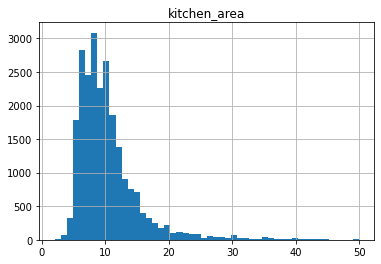

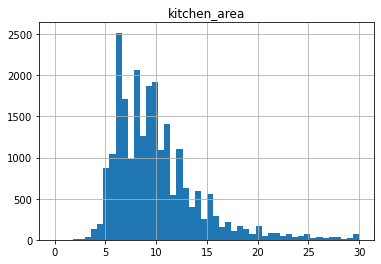

In [30]:
data.drop(index=data.query('kitchen_area < 2').index,inplace=True) #удаляем строки с кухнями менее 2кв.м
data.drop(index=data.query('kitchen_area > 50').index,inplace=True) #удаляем строки с кухнями более 50кв.м

_ = data.hist('kitchen_area', bins=50)
_ = data.hist('kitchen_area', bins=50, range=(0,30))

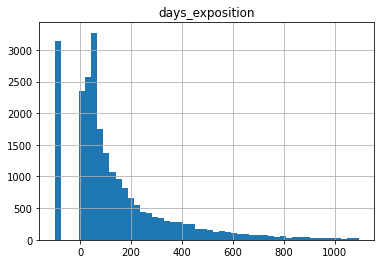

In [31]:
#отбросим объявления, которые висели более 3-х лет
data.drop(index=data.query('days_exposition > 365*3').index,inplace=True)
_ = data.hist('days_exposition', bins=50)

In [32]:
#сбрасываем индексацию после удаления строк
data.reset_index(drop=True,inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23342 entries, 0 to 23341
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23342 non-null  int64         
 1   last_price            23342 non-null  int64         
 2   total_area            23342 non-null  float64       
 3   first_day_exposition  23342 non-null  datetime64[ns]
 4   rooms                 23342 non-null  int64         
 5   ceiling_height        23342 non-null  float64       
 6   floors_total          23258 non-null  float64       
 7   living_area           23342 non-null  float64       
 8   floor                 23342 non-null  int64         
 9   is_apartment          23342 non-null  bool          
 10  studio                23342 non-null  bool          
 11  open_plan             23342 non-null  bool          
 12  kitchen_area          23342 non-null  float64       
 13  balcony         

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Правильно обработала аномальные значения и выбросы, молодец!

### Посчитайте и добавьте в таблицу новые столбцы

Добавляем в таблицу следующие столбцы с параметрами:

* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «‎первый», «последний», «другой»);
* расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [34]:
#считаем цену квадратного метра
data['price_per_square_meter'] = data['last_price'] / data['total_area']
#и для удобства просмотра приводим к типу int
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')
data[['price_per_square_meter']].head(10)

,price_per_square_meter
0,120370
1,82920
2,92785
3,408176
4,100000
5,95065
6,99195
7,110544
8,87454
9,88524


In [35]:
#создаем столбец дня недели,0 - понедельник, 1 - вторник и так далее
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data[['weekday_exposition']].head(10)

,weekday_exposition
0,3
1,1
2,3
3,4
4,1
5,0
6,3
7,3
8,2
9,6


In [36]:
#создаем столбец месяца публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month
data[['month_exposition']].head()

,month_exposition
0,3
1,12
2,8
3,7
4,6


In [37]:
#создаем столбец года публикауции объявления
data['year_exposition'] = data['first_day_exposition'].dt.year
data[['year_exposition']].head(10)

,year_exposition
0,2019
1,2018
2,2015
3,2015
4,2018
5,2018
6,2017
7,2019
8,2018
9,2017


In [38]:
#напишем функцию категоризации по этажам, используя метод apply к каждой строке датафрейма через axis = 1
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

data['floor_category'] = data.apply(floor_category, axis = 1)
data[['floor_category']].head(10)

,floor_category
0,другой
1,первый
2,другой
3,другой
4,другой
5,другой
6,другой
7,другой
8,другой
9,другой


In [39]:
# расстояние до центра города в километрах (переводим из м в км и округляем до целых значений)
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
# Fixed
# try:
data['city_centers_nearest_km'] =  data['city_centers_nearest_km'].astype('Int32')
print('city_centers_nearest_km ok')
# except:
#     print('city_centers_nearest_km Int32 type conversion fail')

city_centers_nearest_km ok


<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Новые столбцы создала правильно, подходящие методы использовала.

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Напоминаю про метод head() и не понятно зачем ты выше использовала try except, можно вполне без него обойтись.

### Проведите исследовательский анализ данных

#### Изучаем параметры объектов

In [40]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,city_centers_nearest_km
count,23342.000000,2.334200e+04,23342.000000,23342.000000,23342.000000,23258.000000,23342.000000,23342.000000,23342.000000,23342.000000,...,17855.000000,7885.000000,17855.000000,8905.000000,23342.000000,2.334200e+04,23342.000000,23342.000000,23342.000000,17854.000000
mean,9.862051,6.188924e+06,59.029267,2.048668,2.436935,10.699931,33.838306,5.899623,10.277946,0.592751,...,0.605153,490.309321,0.763372,519.994385,134.914146,9.853003e+04,2.572059,6.400009,2017.386085,14.260670
std,5.676043,7.345970e+06,29.909989,1.019595,0.402010,6.602123,19.189145,4.887412,5.150688,0.959099,...,0.797186,339.617188,0.933346,277.758277,205.479297,4.634419e+04,1.789849,3.486772,1.020139,8.588806
min,0.000000,4.300000e+05,12.000000,0.000000,1.000000,1.000000,10.000000,1.000000,2.000000,0.000000,...,0.000000,1.000000,0.000000,13.000000,-100.000000,7.962000e+03,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.000000,5.000000,19.000000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,296.000000,22.000000,7.647000e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.500000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,455.000000,0.000000,503.000000,72.000000,9.480100e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.700000e+06,69.000000,3.000000,2.700000,16.000000,42.000000,8.000000,11.850000,1.000000,...,1.000000,612.000000,1.000000,733.000000,193.000000,1.137692e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,3.300000e+08,413.500000,7.000000,4.000000,60.000000,200.000000,33.000000,50.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1095.000000,1.736842e+06,6.000000,12.000000,2019.000000,66.000000


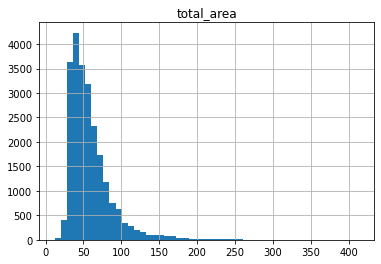

In [41]:
#общая площадь
_ = data.hist('total_area', bins=50)

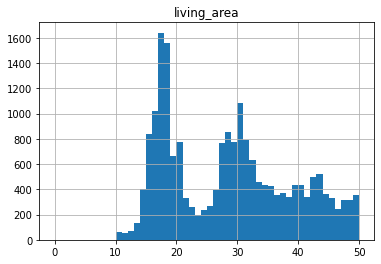

In [42]:
#жилая площадь
_ = data.hist('living_area', bins=50, range=(0,50))

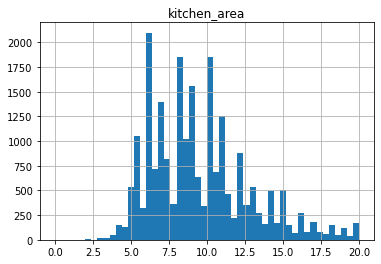

In [43]:
#площадь кухни
_ = data.hist('kitchen_area', bins=50, range=(0,20))

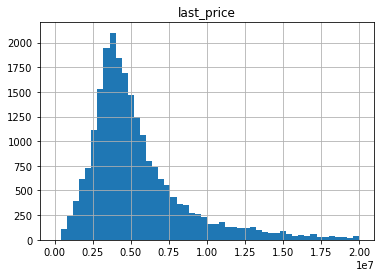

In [44]:
#цена объекта
_ = data.hist('last_price', bins=50, range=(0,2e+07))

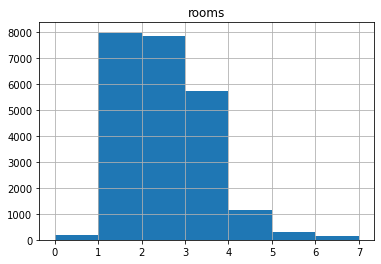

In [45]:
#кол-во комнат
_ = data.hist('rooms', bins=data['rooms'].max())

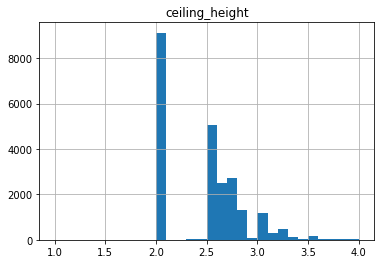

In [46]:
# высота потолков
_ = data.hist('ceiling_height', bins=30)

In [47]:
data['floors_total'] = data['floors_total'].astype('Int64') # была ошибка в типе данных, меняем тут тип данных

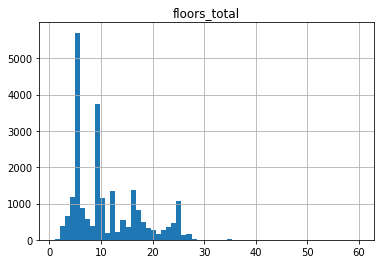

In [48]:
#общее кол-во этажей
_ = data.hist('floors_total', bins=data['floors_total'].max())

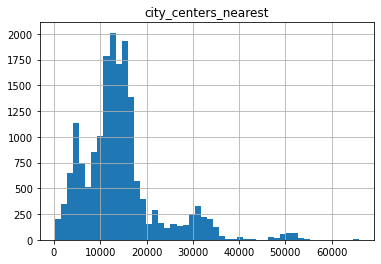

In [49]:
# расстояние до центра города в метрах
_ = data.hist('city_centers_nearest', bins=50)

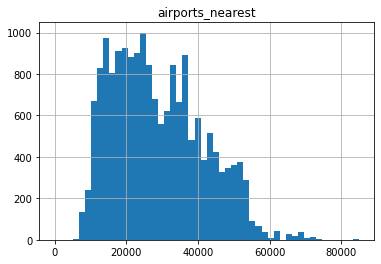

In [50]:
#расстояние до ближайшего аэропорта
_ = data.hist('airports_nearest', bins=50)

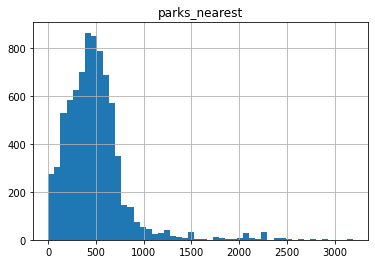

In [51]:
# расстояние до ближайшего парка
_ = data.hist('parks_nearest', bins=50)

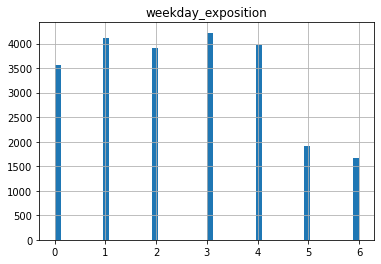

In [52]:
#день публикации объявления
_ = data.hist('weekday_exposition', bins=50)

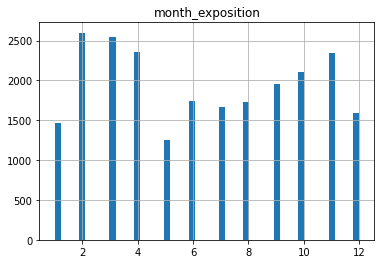

In [53]:
#месяц публикации объявлений
_ = data.hist('month_exposition', bins=50)

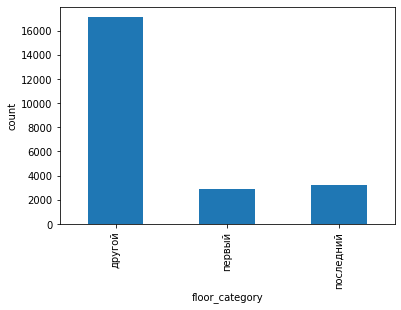

In [54]:
#тип этажа квартиры
_ = data.groupby(by='floor_category')['floor_category'].count().plot(kind='bar', ylabel = 'count')

Построили гистограммы для:

* Тип этажа квартиры («первый», «последний», «другой») в этом случае используем тип bar. Больше всего квартир на "другом" этаже и это логично. Первых и последних этажей одинакого мало.
* Общая площадь. Наблюдаем очень малое количество квартир с общей площадью более 100 кв.м. 
* Жилая площадь. Наблюдаем два пика - на 18 кв.м. и на 30 кв.м. Видимо, стоит перепроверить, почему два пика.
* Площадь кухни выглядит хорошо.
* Цена объекта. Цена объекта выглядит хорошо. Немного "шумный" график. Очень длинный "хвост" вправо - это похоже элитная недвижимость.
* Количество комнат. Больше всего двух- и трёх-комнатных квартир, но встречаются и редкие исключения.
* Высота потолков. Пика 2.5м.
* Этаж квартиры. Больше всего квартир с 1 по 5 этаж.
* Общее количество этажей в доме. Видим явные пики: 5-этажная застройка, 9-этажная застройка, и небольшие пики более высоких новостроек.
* Расстояние до центра города в метрах. Здесь наблюдаем два пика, один маленький, 5км и другой побльшой от 10 км. до 15 км. Так же есть совсем небольшие всплески на 30 км. и 50 км.
* Расстояние до ближайшего аэропорта. Здесь видим довольно "шумный" график. Скорее всего, это в пределах нормы.
* Расстояние до ближайшего парка. Судя по графику больше всего квартир с парками на расстоянии до 750м.
* День и месяц публикации объявления. Видим провал в публикации объявлений в субботу и воскресенье, что логично. Так же видим что с февраля по апрель наблюдалосась повышенная активность. Так же был плавный рост активности с июля по ноябрь. Провалы в декабре, январе и мае.

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Правильно все рассмотрела и описала. Всегда нужно подробно анализировать данные, можно добавить анализ статистик случайных величин, визуализирвоать их с помощью диаграмм размаха, например.

#### Изучение days_exposition -/ как быстро продавались квартиры

Среднее время продажи квартиры в днях: 171
Медианное время продажи квартиры в днях: 94

[Выбросы] Количество объявлений, которые сняты через:
45 дней: 879
60 дней: 536
90 дней: 200


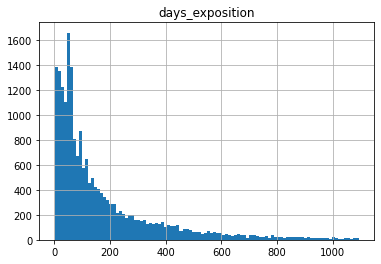

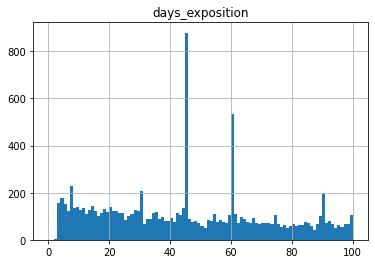

In [55]:
#в предыдущем задании в столбце "days_exposition" мы заменили пустые значения на - 100
# значит, чтобы избавиться от пустных значений, можно поставить фильтр-проверку на больше 0
data[data['days_exposition'] > 0].hist('days_exposition', bins=100);
data[data['days_exposition'] > 0].hist('days_exposition', bins=100, range = (0,100));
print(f'Среднее время продажи квартиры в днях:',int(data[data['days_exposition'] > 0]['days_exposition'].mean()))
print('Медианное время продажи квартиры в днях:',int(data[data['days_exposition'] > 0]['days_exposition'].median()))

print('\n[Выбросы] Количество объявлений, которые сняты через:')
print('45 дней:',data[data['days_exposition']==45]['days_exposition'].count())
print('60 дней:',data[data['days_exposition']==60]['days_exposition'].count())
print('90 дней:',data[data['days_exposition']==90]['days_exposition'].count())

Можно сказать, что среднее время продажи квартиры составляет 171 дней. Но если взять медиану - то это уже 94 дня, в два раза меньше.

Возникает вопрос: *Почему такая разница?* 

Потому что у нас есть "длинный хвост" квартир, которые продавались очень долго, буквально годами.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Нули, которые ты вставила вместо пропусков искажают статистики, еще раз проанализируй сроки продаж без них.

<div class="alert alert-info"
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>    

 * убрали нули
 * проанализировали еще раз

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все так, разница обусловлена оъявлениями, которые очень долго висят на платформе.

#### Факторы которые больше всего влияют на общую (полную) стоимость объекта

In [56]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2.0,755.0,-100,120370,3,3,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,2.00,11,18.600000,1,False,...,NaN,0.0,NaN,81,82920,1,12,2018,первый,19
2,10,5196000,56.00,2015-08-20,2,2.00,5,34.300000,4,False,...,90.0,2.0,574.0,558,92785,3,8,2015,другой,14
3,0,64900000,159.00,2015-07-24,3,2.00,14,90.289724,9,False,...,84.0,3.0,234.0,424,408176,4,7,2015,другой,7
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1.0,48.0,121,100000,1,6,2018,другой,8
5,10,2890000,30.40,2018-09-10,1,2.00,12,14.400000,5,False,...,NaN,NaN,NaN,55,95065,0,9,2018,другой,<NA>
6,6,3700000,37.30,2017-11-02,1,2.00,26,10.600000,6,False,...,NaN,0.0,NaN,155,99195,3,11,2017,другой,19
7,5,7915000,71.60,2019-04-18,2,2.00,24,40.658769,22,False,...,NaN,0.0,NaN,-100,110544,3,4,2019,другой,12
8,20,2900000,33.16,2018-05-23,1,2.00,27,15.430000,26,False,...,NaN,NaN,NaN,189,87454,2,5,2018,другой,<NA>
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,NaN,0.0,NaN,289,88524,6,2,2017,другой,15


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Не нужно целиком выводить датафрейм.

<div class="alert alert-info"
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>    

 * исправленно)))

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Супер)

**Изучим зависимость цены квартиры от общей площади квартиры:**

0.6731579669037413

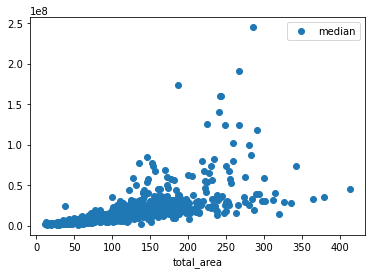

In [57]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['last_price'])

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V2<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Почему ты стала в этот раз смотреть зависимость цены за метр квадратный? В задании требуется посмотреть в этом пункте зависимость общей стоимости квартир от других параметров.

<div class="alert alert-info"
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>    
​
 
   * исправили на соотношение цены квартиры от общей площади


**Вывод:** видим, что зависимость есть (0.67), хоть и не очень сильная. То есть, чем больше площадь тем немного выше стоимость.

**Изучим стоимость квартиры в соотношении с жилой площадью**

0.5976062417829049

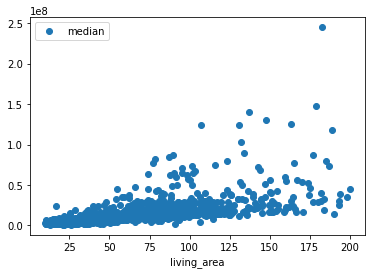

In [58]:
pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area.columns = ['mean', 'count', 'median']
pivot_table_living_area.plot(y = 'median', style = 'o')

pivot_table_living_area.sort_values('median', ascending = False)

data['living_area'].corr(data['last_price'])

**Вывод:** средняя зависимость.

**Изучим стоимость квартиры в соотношении с площадью кухни**

0.5128522718771996

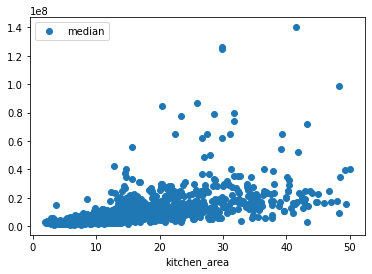

In [59]:
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_kitchen_area.columns = ['mean', 'count', 'median']
pivot_table_kitchen_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['kitchen_area'].corr(data['last_price'])

**Вывод:** корреляция слабая (0,51), во всяком случае линейная зависимость слабая.  

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V2<a class="tocSkip"></h2>


<b>На доработку🤔:</b> Не увидел анализа зависимость от жилой площади и площади кухни.

<div class="alert alert-info"
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>    
•
 
* добавлено соотношение стоимости квартиры с жилой площадью
* добавлено соотношение стоимости квартиры с площадью кухни

**Изучим зависимость цены квартиры от числа комнат:**

0.393386864168653

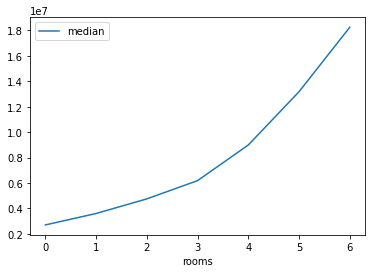

In [60]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['last_price'])

**Вывод:** чем больше кол-во комнат, тем выше стоимость квартиры.

**Изучим зависимость цены квартиры от этажа.**

,mean,count,median
floor_category,,,
другой,6.451645e+06,17128,4800000
первый,4.656170e+06,2876,3900000
последний,6.141942e+06,3257,4300000


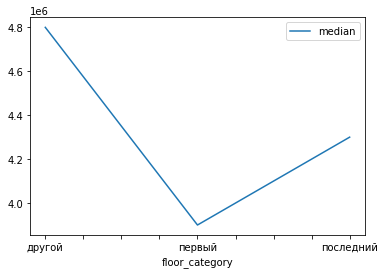

In [61]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
_ = pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V2<a class="tocSkip"></h2>


<b>На доработку🤔:</b> Почему здесь ты не смотришь квартиры на "другом" этаже? На графике нужно также вывести подписи все на оси абсцисс.

**Вывод:** Согласно медиане - как правило квартиры на первом этаже дешевле.

<div class="alert alert-info"
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>    
•
 
* замечания исправлены: "другой" этаж возвращен и оси подписаны

**Изучим зависимость цены квартиры от удалённости от центра:**

-0.2596818380295466

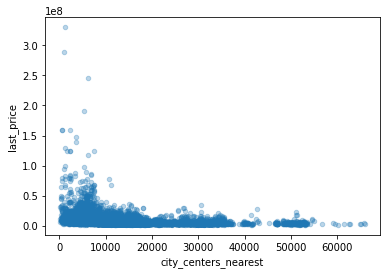

In [62]:
data.plot(kind = 'scatter', y = 'last_price', x = 'city_centers_nearest', alpha = 0.3)
data['city_centers_nearest'].corr(data['last_price'])

**Вывод:** видим слабую линейную зависимость

**Изучим зависимость цены квартиры от даты размещения: дня недели.**

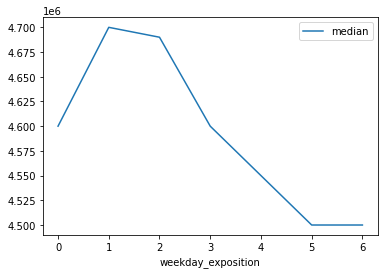

In [63]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')
_ = pivot_table_weekday_exposition.sort_values('median', ascending = False)

**Вывод:** видим, что чем ближе ко вторнику выставлены объявления тем в среднем выше стоимость, но незначительно. По субботам стоимость самая низкая.

**Изучим зависимость цены квартиры от даты размещения: месяца.**

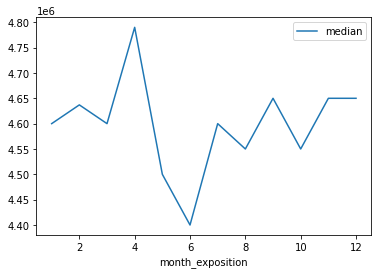

In [64]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')
_ = pivot_table_month_exposition.sort_values('median', ascending = False)

**Вывод:** самая высокая стоимость квартиры в апреле. Самая низкая стоимость в июне.
На рынке недвижимости, как и во многих других сферах присутствует сезонность - в начале лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости. Наверное, это связано с отпусками.

**Изучим зависимость цены квартиры от даты размещения: года.**

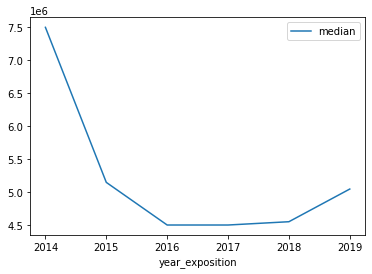

In [65]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')
_ = pivot_table_year_exposition.sort_values('median', ascending = False)

**Вывод:** видим, что с 2014 до 2018 года цена падала, но далее начала увеличиваться .

In [66]:
# Предыдущий код удалять не стали, закомментировали

#list_for = ['total_area',
                  #'living_area',
                 # 'kitchen_area',
                 # 'rooms',
                 # 'weekday_exposition',
                 # 'month_exposition']

#for ror in list_for:
  #  correlation = data['last_price'].corr(data[ror])
  #  print(f'Корреляция между last_price и {ror} составляет: {correlation:0.2%}')

#list_for.plot(x='total_area', y='last_price_m', kind='scatter', grid=True, figsize=(10, 5))

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Корреляция в полной мере никогда не показывает зависимость.

Подробно построй график для каждой пары параметров, для количественных подойдут диаграммы рассеяния, а для категориальных величин подойдут сводные таблицы, сгруппируй данные по категориям и выведи с помощью линейной диаграммы или столбчатой зависимость средней цены квартир от категорий.
    
Опиши подробно как именно зависит цены от всех параметров.
    
Также изучи к каким случайным величинам можно применять коэффициент корреляции Пирсона. Можно ли его здесь использовать для категориальных параметров?
    

<div class="alert alert-info"
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>    

 * построили графики для каждой пары параметров
 * под каждым графиком сделали вывод
 * изучили как можно применять коэффициент корреляции Пирсона
    

</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V2<a class="tocSkip"></h2>


<b>На доработку🤔:</b> Посмотри на влияние параметров на общую цену квартир, скорректируй выводы.

<div class="alert alert-info"
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>    

 * исправленно
    

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно доработала. Видно, что на общую стоимость влияют больше всего площади, количество комнат. В среднем квартиры на первом этаже дешевле, чем на других. Прослеживается также некоторая сезонность в размещении объявлениях.

#### Cредняя цена одного квадратного метра в топ-10 населенных пунктах

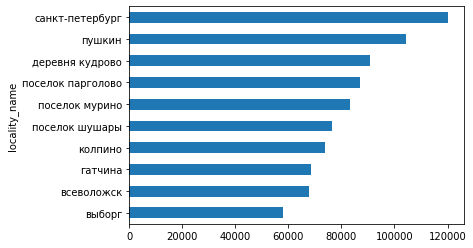

In [67]:
top_10 = data.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count'])
top_10.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']
top_10.pop('total_area_count')
top_10.sort_values(by=['last_price_count'],ascending=False, inplace=True)
top_10 = top_10.iloc[:10]
top_10['price_per_sq_m'] = top_10['last_price_sum']/top_10['total_area_sum']
top_10.sort_values(by=['price_per_sq_m'],ascending=True, inplace=True)
_ = top_10['price_per_sq_m'].plot(kind='barh')

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все верно

#### Расстояние до центра города

<AxesSubplot:xlabel='city_centers_nearest_km'>

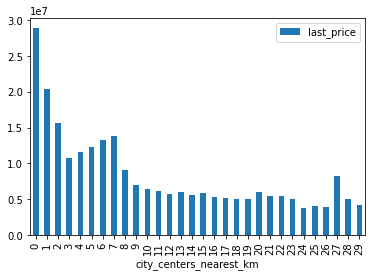

In [68]:
(
    data[data['locality_name']=='санкт-петербург']
    .pivot_table(
        index='city_centers_nearest_km',
        values='last_price',
        aggfunc='mean')
    .plot(kind='bar')
)

С большим отрывом лидирует недвижимость до 1км.
Видим более низкие цены на недвижимость на расстоянии от 1 км. до 7 км. включительно.
Далее цена спадает на расстоянии от 8 км. до 27 км.
Видим пик на 27км, его сложно объяснить, возможно это недвижимость в "особом" районе.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Именно так, прослеживается общая тенденция снижения цены при удалении от центра.

### Общий вывод

Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах. Изучая время продажи квартир мы выявили, что большое количество объявлений было автоматически снято с Яндекс Недвижимость и дату из снятия нельзя считать датой продажи квартиры, поэтому, изучая средние сроки продажи квартир - данные значения не учитывались. 

Работа оказалась очень объемной и сложной.

Данные всё-таки лучше очищать от явных "выбросов", но возможно чистить данные придётся после этапа исследовательского анализа данных. В нашем примере - это дорогие квартиры, которые портили корреляции и графики зависимости полной стоимости от разных параметров. Из необычных особенностей:
* Чем больше площадь тем немного выше стоимость;
* Стоимость квартиры зависит от жилой площади;
* Стоимость квартиры не сильно зависит от площади кухни;
* Чем больше кол-во комнат, тем выше стоимость квартиры;
* Как правило квартиры на первом этаже дешевле;
* Нет линейной зависимости стоимости квартиры от ее удаленности от центра;
* Чем ближе ко вторнику выставлены объявления тем в среднем выше стоимость, но незначительно. По субботам стоимость самая низкая;
* Самая высокая стоимость квартиры в апреле. Самая низкая стоимость в июне
* В 27 км от центра Санкт-Петербурга есть недвижимость по цене почти равная недвижимости в 8 км. от центра;
* В ТОП-10 входят в основном ближайшие к Санкт-Петербургу города и самые крупные города области: Пушкин.

Быстрые продажи это до 95 дней, а необычно долгие - свыше 171 дня.

Выбросы Количество объявлений, которые сняты через:
45 дней: 879
60 дней: 536
90 дней: 200


<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> В итоговом выводе нужно достаточно подробно написать основные пункты выявленных зависимостей. Стоит доработать вывод с учетом моих комментариев по ходу работы. В итоговом выводе также старайся оставлять рекомендации для последующих шагов. Например рекомендации, что можно обработать и проанализировать другие признаки, на что твоим коллегам стоить обратить внимание.

<div class="alert alert-success">
<h2> Комментарий ревьюера V3<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отличный вывод, все четко, понятно и структурировано. Вывод в полной мере отражает существующие зависимости, и по нему можно принимать дальнейшие решения.
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Спасибо за твой проект! Я уверен, что ты приложила все усилия, чтобы сделать этот проект. Это видно по твоей работе, а сформулированные выводы отражают, насколько успешно ты осваиваешь материал.

**Отмечу отдельные положительные моменты проекта🙂**:

* Ты полностью следовала всем этапам выполнения задания и справилась почти со всем. Хорошая работа!
* Отдельно выделю некоторые выводы, которые ты смогла сформулировать абсолютно точно!
* У тебя опрятный и читаемый код. Возможно это звучит банально, однако при работе с чужим кодом это крайне важно)


**На что стоит обратить внимание🤓**:

* Важно доработать итоговый вывод.
* Нужно корректно обработать все признаки.
* Подробно проанализируй зависимость цены от параметров.
* Остальные рекомендации ты найдешь в моих комментариях!


**Желаю удачи и жду твой проект на повторное ревью!**😉

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**


**На что стоит обратить внимание🤓**:

* Важно доработать итоговый вывод.
* Внимательно проанализируй зависимость цены квартир от параметров.
* Остальные рекомендации ты найдешь в моих комментариях!


**Желаю удачи и жду твой проект на повторное ревью!**😉

<div style="border:solid Chocolate 2px; padding: 40px">

Ты отлично справилась с данной работой! Видно, как ты успешно осваиваешь материал, применяешь полученные знания на практике. Мне было очень приятно проверять твою работу, надеюсь, мои комментарии и советы были для тебя полезными.

**Желаю удачи в последующем обучении и исследованиях!**😉